In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.rcParams['axes.unicode_minus'] = False 

file_path = 'iris.csv'
df = pd.read_csv(file_path)

In [2]:
# 检查整个 DataFrame 是否有缺失值,如果有则检查每列有多少缺失值
if df.isnull().any().any():
    print(df.isnull().sum())
else:
    print("normal")

normal


In [3]:
#数据集大小
print(df.shape)

(150, 6)


In [4]:
#查看数据类型
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    150 non-null    int64  
 1   Sepal.Length  150 non-null    float64
 2   Sepal.Width   150 non-null    float64
 3   Petal.Length  150 non-null    float64
 4   Petal.Width   150 non-null    float64
 5   Species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


In [5]:
#查看数据的基本信息
print(df.describe())

       Unnamed: 0  Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
count  150.000000    150.000000   150.000000    150.000000   150.000000
mean    75.500000      5.843333     3.057333      3.758000     1.199333
std     43.445368      0.828066     0.435866      1.765298     0.762238
min      1.000000      4.300000     2.000000      1.000000     0.100000
25%     38.250000      5.100000     2.800000      1.600000     0.300000
50%     75.500000      5.800000     3.000000      4.350000     1.300000
75%    112.750000      6.400000     3.300000      5.100000     1.800000
max    150.000000      7.900000     4.400000      6.900000     2.500000


<Figure size 1000x600 with 0 Axes>

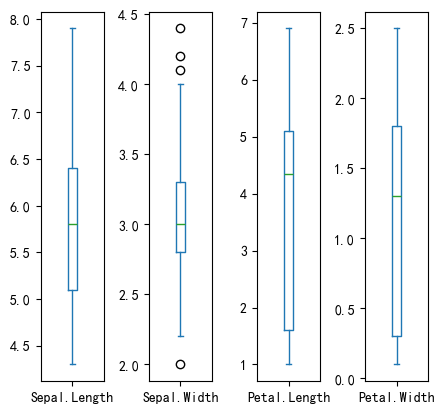

In [6]:
# 删除名为 'Unnamed: 0' 的列
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

#绘制箱线图
plt.figure(figsize=(10, 6))  
df.plot(kind='box', subplots=True, layout=(1, 5), sharex=False, sharey=False)
plt.subplots_adjust(wspace=0.7, hspace=0.3)
plt.show()

array([[<Axes: title={'center': 'Sepal.Length'}>,
        <Axes: title={'center': 'Sepal.Width'}>],
       [<Axes: title={'center': 'Petal.Length'}>,
        <Axes: title={'center': 'Petal.Width'}>]], dtype=object)

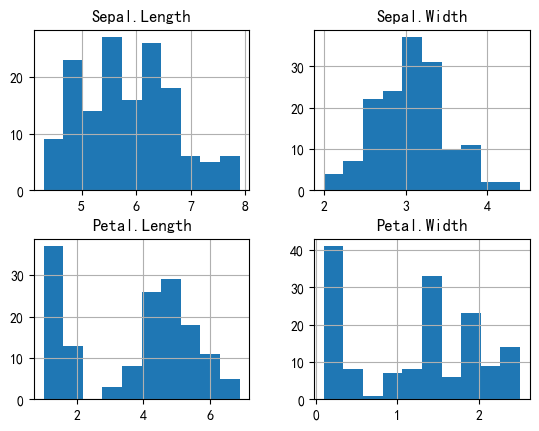

In [7]:
#绘制直方图, 查看各特征的数据分布
df.hist()

<Axes: >

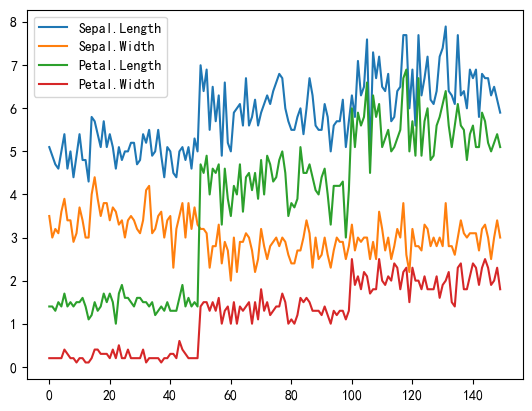

In [8]:
#创建折线图以观察4个特征
df.plot()

<Axes: >

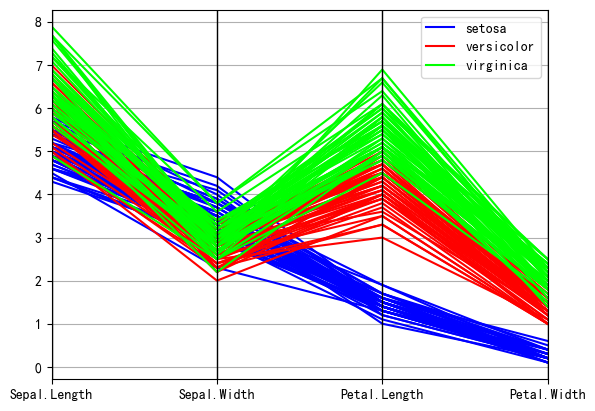

In [9]:
#绘制平行坐标图
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])
pd.plotting.parallel_coordinates(df, 'Species', colormap = 'brg')

### 由上述几个图可知:
- 3种花的花萼长度都较大
- 山鸢尾和变色鸢尾的花萼宽度较小
- 山鸢尾和变色鸢尾的花瓣长度较大
- 3种花的花瓣宽度都较小

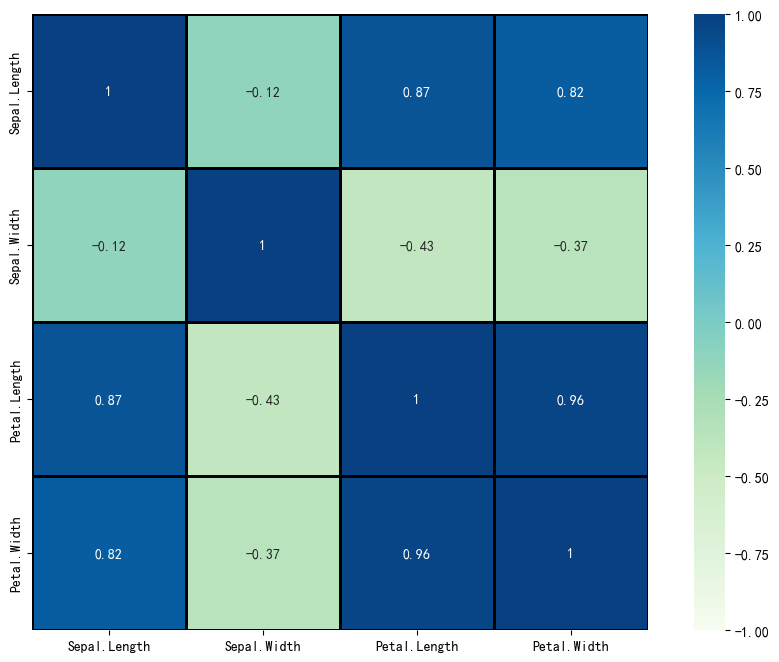

In [10]:
#通过热图找出数据集中不同特征之间的相关性，高正值或负值表明特征具有高度相关性：

# 选择数值列
numeric_df = df.select_dtypes(include=[np.number])

# 计算相关性矩阵
corr_matrix = numeric_df.corr()

fig=plt.gcf()
fig.set_size_inches(12, 8)
fig=sns.heatmap(corr_matrix, annot=True, cmap='GnBu', linewidths=1, linecolor='k', \
                square=True, mask=False, vmin=-1, vmax=1, cbar_kws={"orientation": "vertical"}, cbar=True)


In [11]:
class KMeans:
    def __init__(self, n_clusters, max_iter=100, tol=1e-4, random_state=None):
        """
        初始化 K-means 模型
        :param n_clusters: 簇的数量
        :param max_iter: 最大迭代次数
        :param tol: 收敛阈值
        :param random_state: 随机种子
        """
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.random_state = random_state
        self.centroids = None
        self.labels = None

    def initialize_centroids(self, X):
        """
        随机初始化簇中心
        :param X: 数据集
        """
        np.random.seed(self.random_state)
        random_idx = np.random.permutation(X.shape[0])
        centroids = X[random_idx[:self.n_clusters]]
        return centroids

    def compute_centroids(self, X, labels):
        """
        计算新的簇中心
        :param X: 数据集
        :param labels: 当前的簇标签
        """
        centroids = np.array([X[labels == k].mean(axis=0) for k in range(self.n_clusters)])
        return centroids

    def compute_distances(self, X, centroids):
        """
        计算数据点到簇中心的距离
        :param X: 数据集
        :param centroids: 簇中心
        """
        distances = np.sqrt(((X - centroids[:, np.newaxis]) ** 2).sum(axis=2))
        return distances

    def fit(self, X):
        """
        训练 K-means 模型
        :param X: 数据集
        """
        self.centroids = self.initialize_centroids(X)
        for _ in range(self.max_iter):
            old_centroids = self.centroids.copy()
            distances = self.compute_distances(X, self.centroids)
            self.labels = np.argmin(distances, axis=0)
            self.centroids = self.compute_centroids(X, self.labels)
            # 检查是否收敛
            if np.all(np.abs(self.centroids - old_centroids) < self.tol):
                break

    def predict(self, X):
        """
        预测数据点的簇标签
        :param X: 数据集
        """
        distances = self.compute_distances(X, self.centroids)
        labels = np.argmin(distances, axis=0)
        return labels


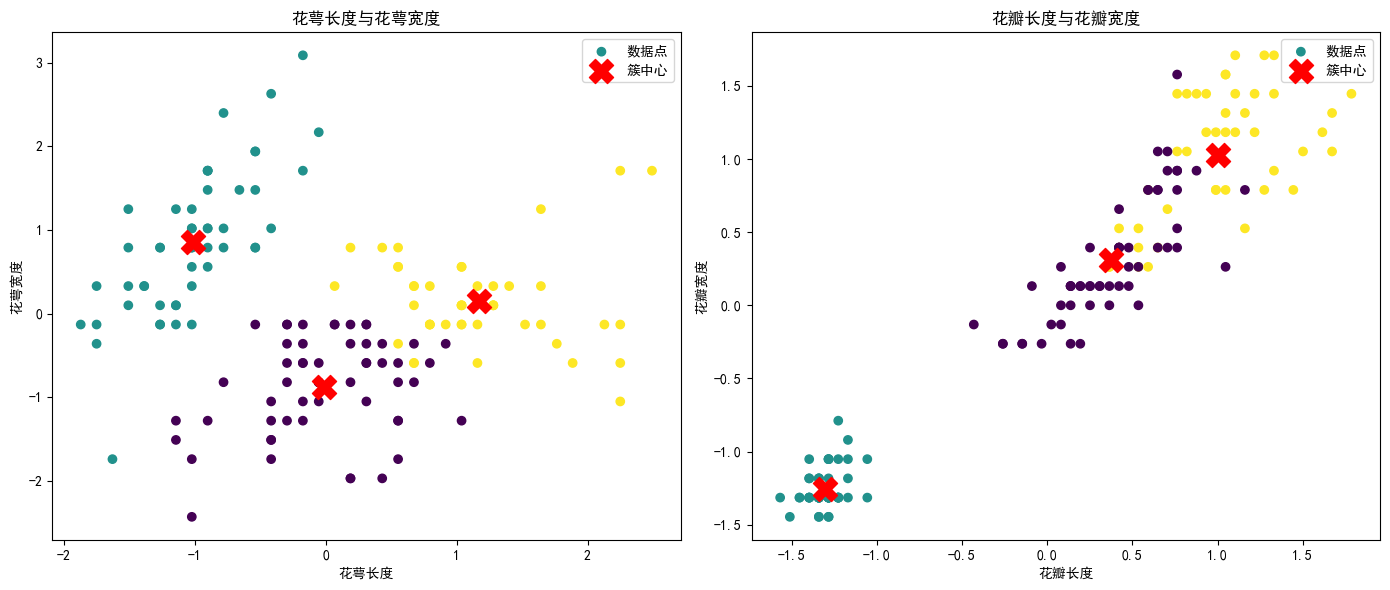

In [14]:
X = df.iloc[:, :4].values

# 标准化数据
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 封装的 K-means 应用
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.predict(X_scaled)

plt.figure(figsize=(14, 6))

# 绘制特征 1 和特征 2 的散点图
plt.subplot(1, 2, 1)  
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', label='数据点')
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], s=300, c='red', marker='X', label='簇中心')
plt.title("花萼长度与花萼宽度")
plt.xlabel("花萼长度")
plt.ylabel("花萼宽度")
plt.legend()

# 绘制特征 3 和特征 4 的散点图
plt.subplot(1, 2, 2)  
plt.scatter(X_scaled[:, 2], X_scaled[:, 3], c=labels, cmap='viridis', label='数据点')
plt.scatter(kmeans.centroids[:, 2], kmeans.centroids[:, 3], s=300, c='red', marker='X', label='簇中心')
plt.title("花瓣长度与花瓣宽度")
plt.xlabel("花瓣长度")
plt.ylabel("花瓣宽度")
plt.legend()

plt.tight_layout()
plt.show()

### 拓展

In [19]:
from sklearn.metrics import silhouette_score, adjusted_rand_score
y_true = df.iloc[:, 4].values

# 评估聚类效果
silhouette_avg = silhouette_score(X_scaled, labels)
print(f"轮廓系数: {silhouette_avg:.2f}")

#计算调整兰德指数
ari = adjusted_rand_score(y_true, labels)
print(f"调整兰德指数: {ari:.2f}")

轮廓系数: 0.46
调整兰德指数: 0.59
